In [1]:
import sys
sys.path.insert(0, '../Tilings') # prepend the path to the Tiling package

import Tilings as tl
import QuantumGraph as QGraph

import numpy as np
import matplotlib.pyplot as plt

import networkx as nx
from networkx.algorithms import bipartite

import scipy.linalg
from scipy.sparse.linalg import eigsh

%matplotlib inline

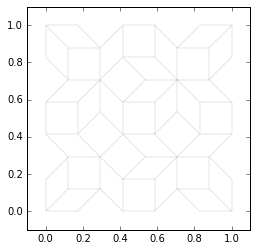

In [2]:
def square0(orig, ea, eb):
    """
    create a square with edges along ea and eb
    the arrows of the square are directed by ea and eb
    """
    if not np.isclose(np.vdot(ea, eb).real, 0, atol = 1e-10):
        raise RuntimeError("The specified edges cannot be used to create a square " + str(np.vdot(ea, eb).real))
    
    B = orig
    A = orig + ea
    C = orig + ea + eb
    t1 = (1, (A, B, C))
    
    A = orig + eb
    t2 = (1, (A, B, C))
    
    return [t1, t2]

n = 2 # number of inflations

# create a tiling whose basic tile is a square
e = np.exp(1j*np.pi*np.arange(4)/4)
square = tl.A5(square0(0,e[0],e[2]))
square.it_sub(n)

# plot
delt = 0.1
QGraph.plot(square._graph, lims=((-delt,1+delt),(-delt,1+delt)))

In [3]:
"""
Free-boundaries approximant is bipartite
"""

bipartite.is_bipartite(square._graph)

True

In [4]:
"""
Periodic-boundaries approximant is not bipartite
"""

pg = QGraph.periodize(square._graph)
bipartite.is_bipartite(pg)

False

In [5]:
def dos(spec, epsilon, z):
    """
    Compute DoS at energy z with lorenzian broadening epsilon, for spectrum spec
    """
    peaks = epsilon/(((spec - z)**2 + epsilon**2)*np.pi)
    return np.sum(peaks)/len(peaks)

def delduplicates(spec, ndec):
    """
    Remove degenerate levels in spec, after rounding up to ndec decimals
    """
    nspec = np.around(spec, decimals=ndec)
    return np.unique(nspec)

In [6]:
"""
Construct the hamiltonians
"""

# generate the tiling
n = 5
square = tl.A5(square0(0,e[0],e[2]))
square.it_sub(n)

# bipartite hamiltonian with free boundary conditions
hfree = -1.*nx.to_numpy_matrix(square._graph, dtype="float")

# non-bipartite hamiltonian with periodic boundary conditions
pg = QGraph.periodize(square._graph)
hper = -1.*nx.to_numpy_matrix(pg, dtype="float")

In [7]:
"""
Compute the spectra
"""

#specfree = scipy.linalg.eigh(hfree, eigvals_only=True)
#specper = scipy.linalg.eigh(hper, eigvals_only=True)

"""
Save data
"""

#np.save('data/approximant_spectra/free/' +  'gen_' + str(n), specfree)
#np.save('data/approximant_spectra/periodic/' + 'gen_' + str(n) + '_k_0', specper)

"""
Pickle data
"""

specfree = np.load('data/approximant_spectra/free/' +  'gen_' + str(n) + '.npy')
specper = np.load('data/approximant_spectra/periodic/' + 'gen_' + str(n) + '_k_0' + '.npy')

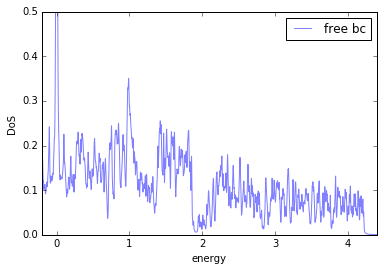

In [16]:
"""
Plot the DoS
"""

# spectral broadening
eps = 0.004

# energy range
N = 3*len(pg)
erange = np.linspace(-4.4, 4.4, N)

# free bc
dosfree = np.array([dos(specfree, eps, e) for e in erange])
#dosfree /= np.sum(dosfree)/len(erange)
#plt.plot(erange, dosfree)

# periodic bc
dosper = np.array([dos(specper, eps, e) for e in erange])
#dosper /= np.sum(dosper)/len(erange)
plt.plot(erange, dosper, alpha = 0.5)

plt.ylim((0, 0.5))
plt.xlim((-.2, 4.4))
plt.xlabel('energy')
plt.ylabel('DoS')
plt.legend(('free bc', 'periodic bc'))


In [17]:
len(specper)

8119

## Close up on the main gap

In [10]:
def sparse_spec(h, e, nlevels):
    """
    Return the nlevels energy levels around energy e
    /!\ h has to be a sparse matrix
    """
    return eigsh(h, k=nlevels, sigma=e, return_eigenvectors=False, which="BE")

In [13]:
"""
Construct the hamiltonians
"""

# generate the tiling
n = 6
square = tl.A5(square0(0,e[0],e[2]))
square.it_sub(n)

# bipartite hamiltonian with free boundary conditions
hfree = -1.*nx.to_scipy_sparse_matrix(square._graph, dtype="float")

# non-bipartite hamiltonian with periodic boundary conditions
pg = QGraph.periodize(square._graph)
hper = -1.*nx.to_scipy_sparse_matrix(pg, dtype="float")

In [45]:
"""
Compute the partial spectra (left gap)
"""
eleft = -1.95 # approximative energy of the gap
nstates = 200 # number of states around the gap

partfree = sparse_spec(hfree, eleft, nstates)
partper = sparse_spec(hper, eleft, nstates)

"""
Save data
"""

np.save('data/approximant_spectra/free/' +  'gen_' + str(n) + '_lgap', partfree)
np.save('data/approximant_spectra/periodic/' + 'gen_' + str(n) + '_k_0' + '_lgap', partper)

"""
Pickle data
"""

partfree = np.load('data/approximant_spectra/free/' +  'gen_' + str(n) + '_lgap.npy')
partper = np.load('data/approximant_spectra/periodic/' + 'gen_' + str(n) + '_k_0' + '_lgap.npy')

In [20]:
"""
Compute the partial spectra (right gap)
"""
n = 6
eright = 1.9 # approximative energy of the gap
nstates = 200 # number of states around the gap

#partfree = sparse_spec(hfree, eright, nstates)
#partper = sparse_spec(hper, eright, nstates)

"""
Save data
"""

#np.save('data/approximant_spectra/free/' +  'gen_' + str(n) + '_rgap', partfree)
#np.save('data/approximant_spectra/periodic/' + 'gen_' + str(n) + '_k_0' + '_rgap', partper)

"""
Pickle data
"""

partfree = np.load('data/approximant_spectra/free/' +  'gen_' + str(n) + '_rgap.npy')
partper = np.load('data/approximant_spectra/periodic/' + 'gen_' + str(n) + '_k_0' + '_rgap.npy')

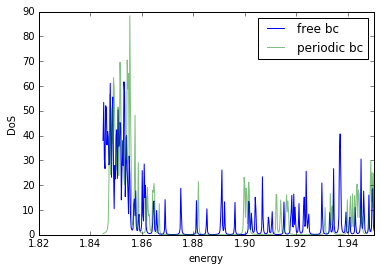

In [22]:
"""
Plot the DoS
"""

# spectral broadening
eps = 0.0001

# energy range
N = 3*len(partfree)
delt = 0
erange = np.linspace(min(partfree) - delt, max(partfree) + delt, N)

# free bc
dosfree = np.array([dos(partfree, eps, e) for e in erange])
#dosfree /= np.sum(dosfree)/len(erange)
plt.plot(erange, dosfree)

# periodic bc
dosper = np.array([dos(partper, eps, e) for e in erange])
#dosper /= np.sum(dosper)/len(erange)
plt.plot(erange, dosper, alpha = 0.5)

#plt.ylim((0, 5.5))
plt.xlim((1.82, 1.95))
plt.xlabel('energy')
plt.ylabel('DoS')
plt.legend(('free bc', 'periodic bc'))


## Varying the wavevector

In [23]:
"""
/!\ this code is wrong: it does not take into account the fact that an edge can be horizontal and vertical 
at the same time.
Anyway, it is out of date (periodized graph not longer have the 'periodized' edge attribute).
"""

def h_periodic(graph, tx, ty):
    """
    Return the (sparse) hamiltonian of a periodic graph, with jump amplitudes tx and ty at the edges.
    """
    # set the jump amplitudes to -1
    nx.set_edge_attributes(pg, 'jump', -1.)

    # set the amplitudes of the edge bonds
    for e in pg.edges(data='periodized'):
        if e[2] == 'horizontal':
            pg[e[0]][e[1]]['jump'] = tx
        if e[2] == 'vertical':
            pg[e[0]][e[1]]['jump'] = ty
            
    return nx.to_scipy_sparse_matrix(pg, weight="jump")

In [24]:
# generate the tiling
n = 2
square = tl.A5(square0(0,e[0],e[2]))
square.it_sub(n)

pg = QGraph.periodize(square._graph)

# k = (0,0)
hpp = h_periodic(pg, -1., -1.)
# k = (pi,0)
hap = h_periodic(pg, 1., -1.)
# k = (0,pi)
hpa = h_periodic(pg, -1., 1.)
# k = (pi,pi)
haa = h_periodic(pg, 1., 1.)

hs = [hpp, hap, hpa, haa]
specs = []
for h in hs:
    specs.append(scipy.linalg.eigh(h.todense(), eigvals_only=True))

In [25]:
#for spec in specs:
#    plt.plot(spec, 'o', markersize=2, alpha=1.)
plt.plot(specs[0],'*')
plt.plot(specs[3],'*')
plt.plot(specs[1],'+')
plt.plot(specs[2],'+')

plt.savefig('spectra.png', dpi = 200)

In [27]:
N = 3*len(specs[0])
erange = np.linspace(-4.4, 4.4, N)
eps = 0.01

doss = []
for spec in specs:
    doss.append(np.array([dos(spec, eps, e) for e in erange]))

In [28]:
upper_edge = np.array([max(ens) for ens in np.array(specs).T])
lower_edge = np.array([min(ens) for ens in np.array(specs).T])

In [29]:
plt.plot(upper_edge, 'r')
plt.plot(lower_edge, 'r')

In [30]:
plt.plot(upper_edge - lower_edge, 'o')